# Created a fully-connected net for MNIST classification. 

question no: 1

In [312]:
import tensorflow as tf
tf.__version__

'1.12.0'

In [313]:
mnist = tf.keras.datasets.mnist # 28*28images of hand written digits from 0 t0 9
print(mnist)

(x_train, y_train), (x_test, y_test) = mnist.load_data()

<module 'tensorflow._api.v1.keras.datasets.mnist' from 'C:\\Anaconda3\\lib\\site-packages\\tensorflow\\_api\\v1\\keras\\datasets\\mnist\\__init__.py'>


In [314]:
# Normalise the dataset

x_train_N = tf.keras.utils.normalize(x_train, axis=1)
x_test_N =  tf.keras.utils.normalize(x_test, axis=1)
l_train=tf.keras.utils.to_categorical(y_train,10)
l_test=tf.keras.utils.to_categorical(y_test,10)

x_train_N=x_train_N.reshape(60000,784)
x_test_N=x_test_N.reshape(10000,784)
print(x_train_N.shape)

print(x_test_N.shape)
print(x_test_N.dtype)



(60000, 784)
(10000, 784)
float64


In [315]:
# Build the model 
# Feed forward netwrok(SEQUENTIAL)

from keras import models
from keras import layers
from keras.layers import Dropout


model = models.Sequential()


#First Hidden Layer 
model.add(layers.Dense(1024,activation='relu',kernel_initializer='he_normal',input_shape=(784,)))


# 2nd hidden layer 
model.add(layers.Dense(1024, activation='relu',kernel_initializer='he_normal'))



# 3rd hidden layer 
model.add(layers.Dense(1024, activation='relu',kernel_initializer='he_normal'))


# 4th hidden layer 
model.add(layers.Dense(1024, activation='relu',kernel_initializer='he_normal'))


#5th hidden layer
model.add(layers.Dense(1024, activation='relu',kernel_initializer='he_normal'))



# final layer, since it is multiclassification problem we are going to use softmax activation function which gives output as probablity distribution
model.add(layers.Dense(10, activation='softmax'))

# parameters for the training of the model
# neural netwrok tries to minimize the loss, loss is relationship to accuarcy 

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])



In [316]:
# Training of the model and calculate the loss as well as the accuracy

model.fit(x_train_N,l_train,epochs=80,batch_size=256,validation_split = 0.2,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/80
 - 46s - loss: 0.2735 - acc: 0.9152 - val_loss: 0.1361 - val_acc: 0.9595
Epoch 2/80
 - 44s - loss: 0.0937 - acc: 0.9713 - val_loss: 0.1153 - val_acc: 0.9664
Epoch 3/80
 - 44s - loss: 0.0627 - acc: 0.9810 - val_loss: 0.1335 - val_acc: 0.9622
Epoch 4/80
 - 45s - loss: 0.0464 - acc: 0.9856 - val_loss: 0.1194 - val_acc: 0.9648
Epoch 5/80
 - 44s - loss: 0.0380 - acc: 0.9880 - val_loss: 0.1244 - val_acc: 0.9701
Epoch 6/80
 - 44s - loss: 0.0279 - acc: 0.9911 - val_loss: 0.1093 - val_acc: 0.9725
Epoch 7/80
 - 44s - loss: 0.0277 - acc: 0.9916 - val_loss: 0.1105 - val_acc: 0.9740
Epoch 8/80
 - 44s - loss: 0.0197 - acc: 0.9944 - val_loss: 0.1262 - val_acc: 0.9711
Epoch 9/80
 - 45s - loss: 0.0186 - acc: 0.9943 - val_loss: 0.1342 - val_acc: 0.9730
Epoch 10/80
 - 44s - loss: 0.0205 - acc: 0.9940 - val_loss: 0.1268 - val_acc: 0.9736
Epoch 11/80
 - 44s - loss: 0.0224 - acc: 0.9932 - val_loss: 0.1186 - val_acc: 0.9748
Epoch 12/80
 - 45s - los

In [318]:
# Calculated loss and accuracy on test data 

test_loss,test_acc=model.evaluate(x_test_N,l_test)
print("The loss on the test data: ")
print(test_loss)

print("Accuarcy of the model on the  test data:")
print(test_acc)


## End of question 1.1

10000/10000 [==============================] - 6s 594us/step
The loss on the test data: 
0.16522263501132853
Accuarcy of the model on the  test data:
0.9823


In [319]:
# Summary of model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_113 (Dense)            (None, 1024)              803840    
_________________________________________________________________
dense_114 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_115 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_116 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_117 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_118 (Dense)            (None, 10)                10250     
Total params: 5,012,490
Trainable params: 5,012,490
Non-trainable params: 0
_________________________________________________________________


In [320]:
# Predicted outputs by the model
import numpy as np

for i in range(10):
    print(np.argmax(predictions[i])) # Gives the value predicted by the model for the ith index index of x_test.

7
2
1
0
4
1
4
9
5
9


In [321]:
# The output of the softmax function is the probability distribution
predictions = model.predict([x_test_N])
print(predictions.shape)
print(predictions[0])

(10000, 10)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


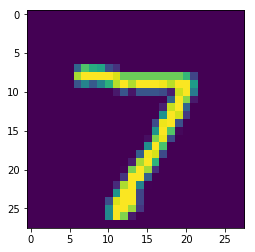

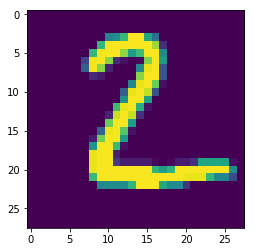

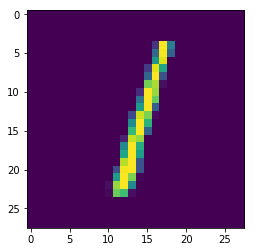

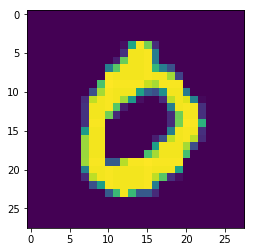

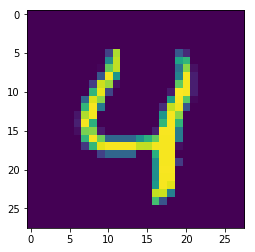

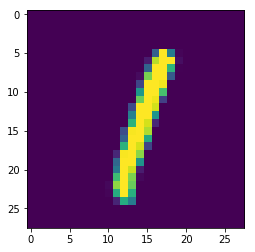

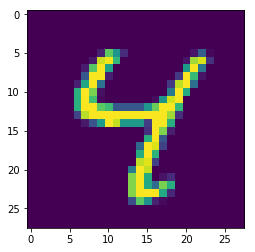

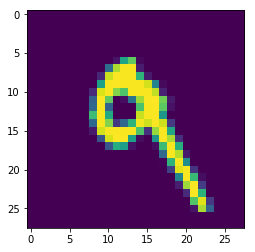

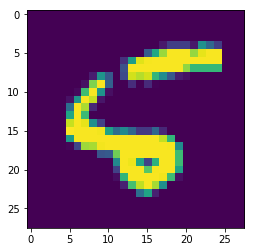

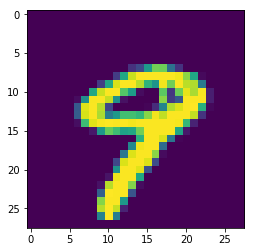

In [322]:
# Below are the plots of input test data
for i in range(10):
    plt.imshow(x_test[i])
    plt.show()
   

In [331]:
#output of intermediate layers
#Reference was taken from Stack overflow site
from keras.models import Model
intermediate_output = []
for i in range(6):
    intermediate_layer_model=Model(inputs=model.input,outputs=model.get_layer(index = i).output)
    intermediate_output.append(intermediate_layer_model.predict(x_test_N[:1000]))
print(intermediate_output[1].shape)

(1000, 1024)


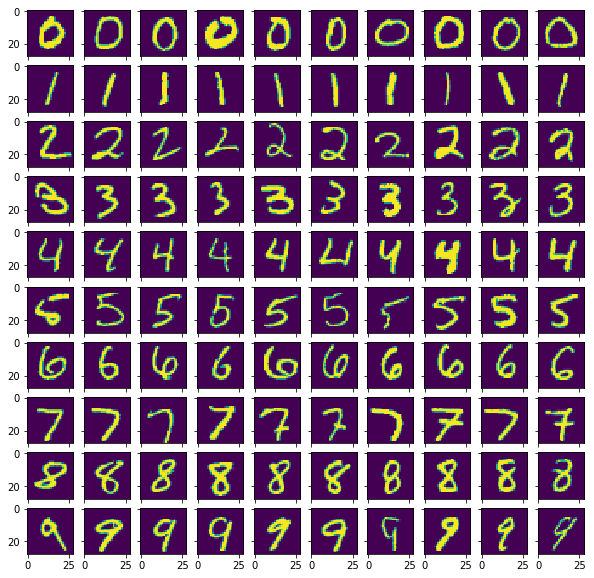

In [332]:
# Predicted outputs by the model
import numpy as np

a0=[]
a1=[]
a2=[]
a3=[]
a4=[]
a5=[]
a6=[]
a7=[]
a8=[]
a9=[]

# for i in range(10):
#     print(np.argmax(predictions[i])) # Gives the value predicted by the model for the ith index index of x_test.
for j in range(10000):
    if np.argmax(predictions[j])==0:
        a0.append(j)
    if np.argmax(predictions[j])==1:
        a1.append(j)
    if np.argmax(predictions[j])==2:
        a2.append(j)
    if np.argmax(predictions[j])==3:
        a3.append(j)
    if np.argmax(predictions[j])==4:
        a4.append(j)
    if np.argmax(predictions[j])==5:
        a5.append(j)
    if np.argmax(predictions[j])==6:
        a6.append(j)
    if np.argmax(predictions[j])==7:
        a7.append(j)
    if np.argmax(predictions[j])==8:
        a8.append(j)
    if np.argmax(predictions[j])==9:
        a9.append(j)
        
        
fig, ax = plt.subplots(10, 10, sharex='col', sharey='row',figsize=(10, 10))
a=[a0,a1,a2,a3,a4,a5,a6,a7,a8,a9]

for i in range(0,10):
    if len(a[i]) > 0:
        for j in range(0,10):
            if j < len(a[i]):
                ax[i][j].imshow(x_test[a[i][j]])
plt.show()
   



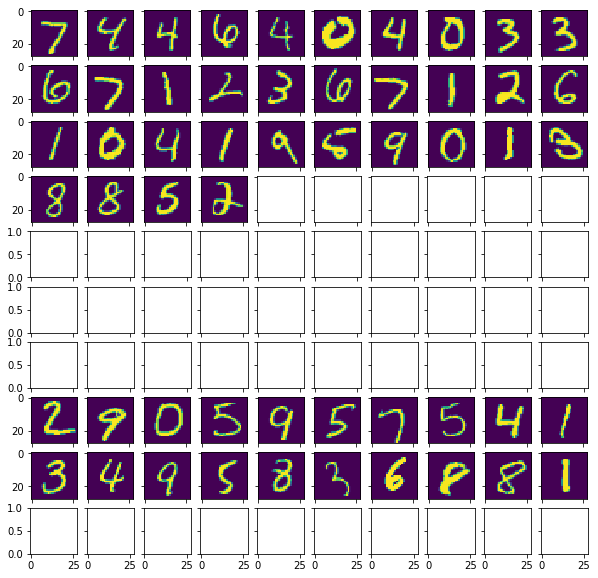

In [337]:
# Predicted outputs of hidden layers
#Hidden Layer 5th - second last layer
import random

k_5=(intermediate_output[4])[:,90:100]
random.shuffle(k_5)



import numpy as np

a01=[]
a11=[]
a21=[]
a31=[]
a41=[]
a51=[]
a61=[]
a71=[]
a81=[]
a91=[]


for j in range(1000):
    if np.argmax((k_5)[j])==0:
        a01.append(j)
    if np.argmax((k_5)[j])==1:
        a11.append(j)
    if np.argmax((k_5)[j])==2:
        a21.append(j)
    if np.argmax((k_5)[j])==3:
        a31.append(j)
    if np.argmax((k_5)[j])==4:
        a41.append(j)
    if np.argmax((k_5)[j])==5:
        a51.append(j)
    if np.argmax((k_5)[j])==6:
        a61.append(j)
    if np.argmax((k_5)[j])==7:
        a71.append(j)
    if np.argmax((k_5)[j])==8:
        a81.append(j)
    if np.argmax((k_5)[j])==9:
        a91.append(j)

        
fig, ax = plt.subplots(10, 10, sharex='col', sharey='row',figsize=(10, 10))

b1 = [a01,a11,a21,a31,a41,a51,a61,a71,a81,a91]
for i in range(0,10):
    if len(b1[i]) > 0:
        for j in range(0,10):
            if j < len(b1[i]):
                ax[i][j].imshow(x_test[b1[i][j]])
plt.show()
   

Question 1.4

My observation compared to results in 1.3 are:

1.The output of second last unit have errors. Digits are clustered in wrong class. Wrong clustering might have happened, since some points might have stucked in local minima. On the other hand, the output of final layers shows almost correct results.

2.The output of second layer was unable to classify the distored digit correctly whereas the output of final layers has minutely observed the distorted digits and was able to classify them correctly.

Ideally, the output of second to last layer should contain maximum important features, so that the output predicted by final layer should be closest to the actual output. 

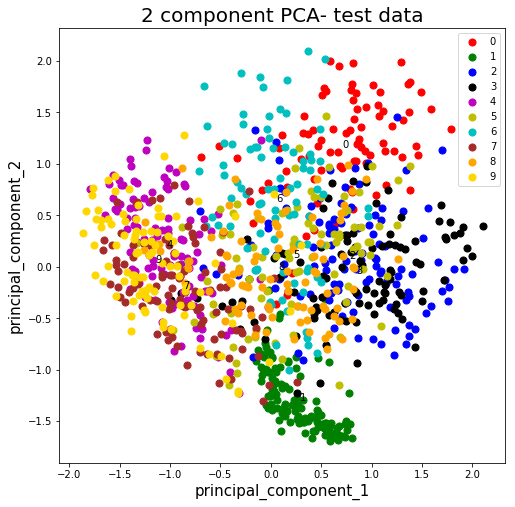

In [338]:
##applying PCA for the test data of size 1000
# Reference was taken from Towards Data Science site

import pandas as pd



from sklearn.decomposition import PCA
x=x_test_N[:1000,]
x.shape

y=y_test[:1000]
target=pd.DataFrame(y)



pca_test = PCA(n_components=2).fit_transform(x)
pricipaldf=pd.DataFrame(data=pca_test,columns=['principal_component_1','principal_component_2'])


finaldf=pd.concat([pricipaldf,target],axis=1)
finaldf.columns = ['principal_component_1','principal_component_2','target']





fig=plt.figure(figsize=(8,8))
ax=plt.axes()
ax.set_xlabel('principal_component_1', fontsize=15)
ax.set_ylabel('principal_component_2',fontsize=15)
ax.set_title('2 component PCA- test data',fontsize=20)
targets=[0,1,2,3,4,5,6,7,8,9]
colors=['r','g','b','k','m','y','c','brown','orange','gold']

for target_num, color in zip(targets,colors):
    indicesToKeep=finaldf['target']==target_num
    
    temp_mean_x = finaldf.loc[indicesToKeep, 'principal_component_1'].mean()
    temp_mean_y = finaldf.loc[indicesToKeep, 'principal_component_2'].mean()
    plt.text(temp_mean_x, temp_mean_y, target_num)
    ax.scatter(finaldf.loc[indicesToKeep, 'principal_component_1'],finaldf.loc[indicesToKeep, 'principal_component_2'],c=color,s=50)
    ax.legend(targets)
    ax.grid()
    


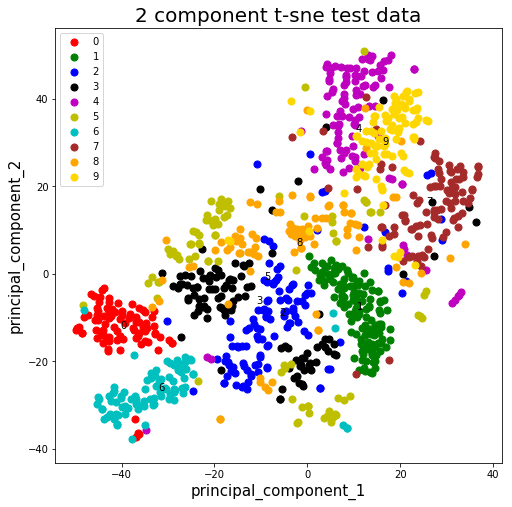

In [339]:
###applying t-SNE  for the test data of size 1000
#

from sklearn.manifold import TSNE
tsne_test= TSNE(n_components=2).fit_transform(x)
tsne_test.shape

pricipaldf_t=pd.DataFrame(data=tsne_test,columns=['principal_component_1t','principal_component_2t'])


finaldf_t=pd.concat([pricipaldf_t,target],axis=1)
finaldf_t.columns = ['principal_component_1t','principal_component_2t','target']




fig=plt.figure(figsize=(8,8))
ax=plt.axes()
ax.set_xlabel('principal_component_1', fontsize=15)
ax.set_ylabel('principal_component_2',fontsize=15)
ax.set_title('2 component t-sne test data',fontsize=20)
targets=[0,1,2,3,4,5,6,7,8,9]
colors=['r','g','b','k','m','y','c','brown','orange','gold']

for target_num, color in zip(targets,colors):
    indicesToKeep=finaldf_t['target']==target_num
    temp_mean_x = finaldf_t.loc[indicesToKeep, 'principal_component_1t'].mean()
    temp_mean_y = finaldf_t.loc[indicesToKeep, 'principal_component_2t'].mean()
    plt.text(temp_mean_x, temp_mean_y, target_num)
    ax.scatter(finaldf_t.loc[indicesToKeep, 'principal_component_1t'],finaldf_t.loc[indicesToKeep, 'principal_component_2t'],c=color,s=50)
    ax.legend(targets)
    ax.grid()


   principal_component_11  principal_component_21  target
0                1.957647                4.972880       7
1               -2.731992               -0.722278       2
2               -0.853898               -0.408650       1
3               -0.705191                0.945027       0
4                3.010351               -1.253602       4


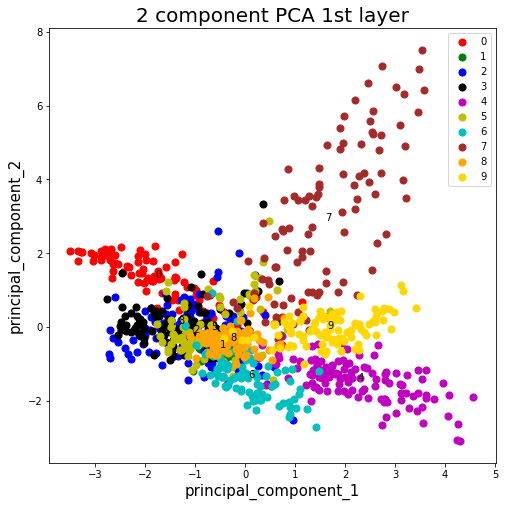

In [340]:
# 1st layer # PCA
#Reference was taken from Towards Data Science site
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
pca_pred_l1=PCA(n_components=2).fit_transform(intermediate_output[0])
pricipaldf1=pd.DataFrame(data=pca_pred_l1,columns=['principal_component_11','principal_component_21'])


y=y_test[:1000]
target=pd.DataFrame(y)

finaldf1=pd.concat([pricipaldf1,target],axis=1)
finaldf1.columns = ['principal_component_11','principal_component_21','target']
print(finaldf1.head(5))

fig=plt.figure(figsize=(8,8))
ax=plt.axes()
ax.set_xlabel('principal_component_1', fontsize=15)
ax.set_ylabel('principal_component_2',fontsize=15)
ax.set_title('2 component PCA 1st layer',fontsize=20)
targets1=[0,1,2,3,4,5,6,7,8,9]
colors=['r','g','b','k','m','y','c','brown','orange','gold']


for target_num, color in zip(targets1,colors):
    indicesToKeep=finaldf1['target']==target_num
    temp_mean_x = finaldf1.loc[indicesToKeep, 'principal_component_11'].mean()
    temp_mean_y = finaldf1.loc[indicesToKeep, 'principal_component_21'].mean()
    plt.text(temp_mean_x, temp_mean_y, target_num)

    ax.scatter(finaldf1.loc[indicesToKeep, 'principal_component_11'],finaldf1.loc[indicesToKeep, 'principal_component_21'],c=color,s=50)
    ax.legend(targets1)
    ax.grid()

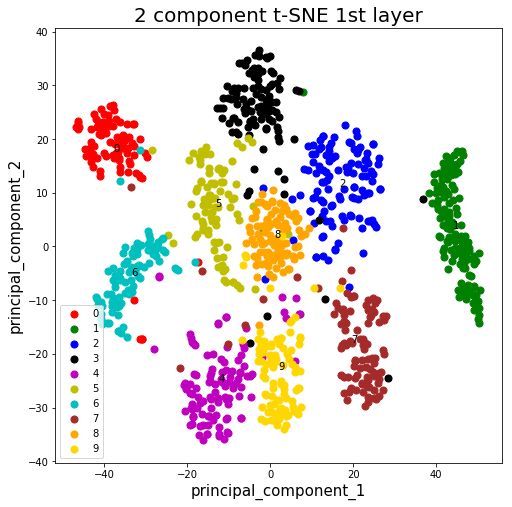

In [341]:
# 1st layer # t-SNE
import pandas as pd
import numpy as np

pca_pred_l1_t=TSNE(n_components=2).fit_transform(intermediate_output[0])
pricipaldf1_t=pd.DataFrame(data=pca_pred_l1_t,columns=['principal_component_11t','principal_component_21t'])


y=y_test[:1000]
target=pd.DataFrame(y)

finaldf1_t=pd.concat([pricipaldf1_t,target],axis=1)
finaldf1_t.columns = ['principal_component_11t','principal_component_21t','target']


fig=plt.figure(figsize=(8,8))
ax=plt.axes()
ax.set_xlabel('principal_component_1', fontsize=15)
ax.set_ylabel('principal_component_2',fontsize=15)
ax.set_title('2 component t-SNE 1st layer',fontsize=20)
targets1=[0,1,2,3,4,5,6,7,8,9]
colors=['r','g','b','k','m','y','c','brown','orange','gold']

for target_num, color in zip(targets1,colors):
    indicesToKeep=finaldf1_t['target']==target_num
    
    temp_mean_x = finaldf1_t.loc[indicesToKeep, 'principal_component_11t'].mean()
    temp_mean_y = finaldf1_t.loc[indicesToKeep, 'principal_component_21t'].mean()
    plt.text(temp_mean_x, temp_mean_y, target_num)
    ax.scatter(finaldf1_t.loc[indicesToKeep, 'principal_component_11t'],finaldf1_t.loc[indicesToKeep, 'principal_component_21t'],c=color,s=50)
    ax.legend(targets1)
    ax.grid()

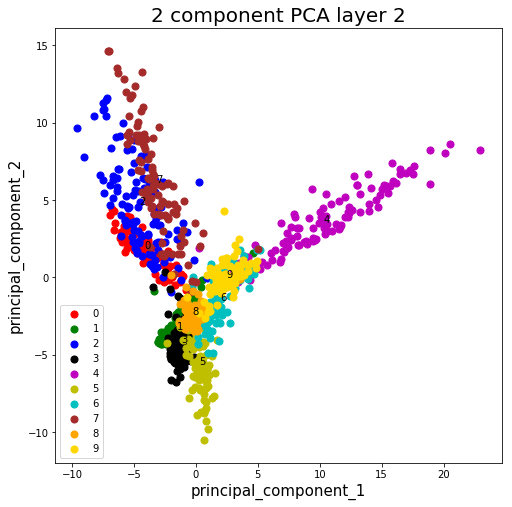

In [342]:
#Layer 2
# Reference was taken from towards DATA SCIENCE SITE AND stack overflow
from sklearn.decomposition import PCA
pca_pred_l2=PCA(n_components=2).fit_transform(intermediate_output[1])
pricipaldf2=pd.DataFrame(data=pca_pred_l2,columns=['principal_component_12','principal_component_22'])


y=y_test[:1000]
target=pd.DataFrame(y)

finaldf2=pd.concat([pricipaldf2,target],axis=1)
finaldf2.columns = ['principal_component_12','principal_component_22','target']



fig=plt.figure(figsize=(8,8))
ax=plt.axes()
ax.set_xlabel('principal_component_1', fontsize=15)
ax.set_ylabel('principal_component_2',fontsize=15)
ax.set_title('2 component PCA layer 2',fontsize=20)
targets2=[0,1,2,3,4,5,6,7,8,9]
colors=['r','g','b','k','m','y','c','brown','orange','gold']

for target_num, color in zip(targets2,colors):
    indicesToKeep=finaldf2['target']==target_num
    
    temp_mean_x = finaldf2.loc[indicesToKeep, 'principal_component_12'].mean()
    temp_mean_y = finaldf2.loc[indicesToKeep, 'principal_component_22'].mean()
    plt.text(temp_mean_x, temp_mean_y, target_num)
    ax.scatter(finaldf2.loc[indicesToKeep, 'principal_component_12'],finaldf2.loc[indicesToKeep, 'principal_component_22'],c=color,s=50)
    ax.legend(targets2)
    ax.grid()

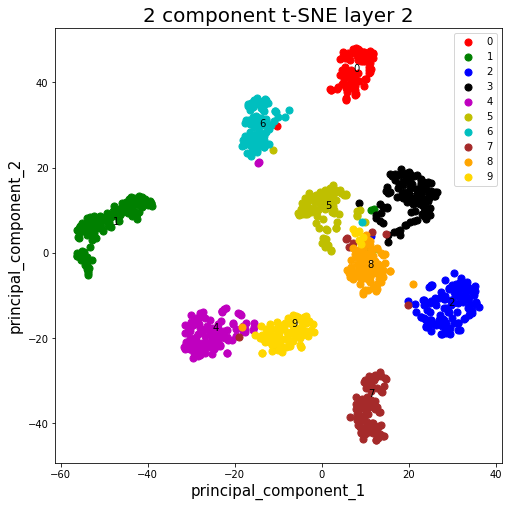

In [343]:
# 2nd layer # t-SNE
import pandas as pd
import numpy as np

pca_pred_l2_t=TSNE(n_components=2).fit_transform(intermediate_output[1])
pricipaldf2_t=pd.DataFrame(data=pca_pred_l2_t,columns=['principal_component_12t','principal_component_22t'])


y=y_test[:1000]
target=pd.DataFrame(y)

finaldf2_t=pd.concat([pricipaldf2_t,target],axis=1)
finaldf2_t.columns = ['principal_component_12t','principal_component_22t','target']


fig=plt.figure(figsize=(8,8))
ax=plt.axes()
ax.set_xlabel('principal_component_1', fontsize=15)
ax.set_ylabel('principal_component_2',fontsize=15)
ax.set_title('2 component t-SNE layer 2',fontsize=20)
targets2=[0,1,2,3,4,5,6,7,8,9]
colors=['r','g','b','k','m','y','c','brown','orange','gold']

for target_num, color in zip(targets2,colors):
    indicesToKeep=finaldf2_t['target']==target_num
    
    temp_mean_x = finaldf2_t.loc[indicesToKeep, 'principal_component_12t'].mean()
    temp_mean_y = finaldf2_t.loc[indicesToKeep, 'principal_component_22t'].mean()
    plt.text(temp_mean_x, temp_mean_y, target_num)
    ax.scatter(finaldf2_t.loc[indicesToKeep, 'principal_component_12t'],finaldf2_t.loc[indicesToKeep, 'principal_component_22t'],c=color,s=50)
    ax.legend(targets2)
    ax.grid()


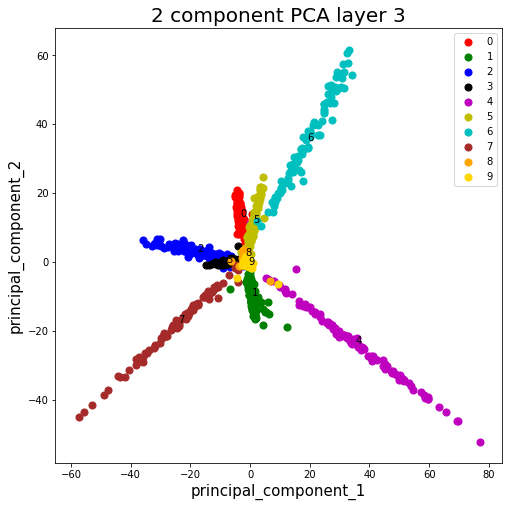

In [344]:
# Layer 3
from sklearn.decomposition import PCA
pca_pred_l3=PCA(n_components=2).fit_transform(intermediate_output[2])
pricipaldf3=pd.DataFrame(data=pca_pred_l3,columns=['principal_component_13','principal_component_23'])


y=y_test[:1000]
target=pd.DataFrame(y)

finaldf3=pd.concat([pricipaldf3,target],axis=1)
finaldf3.columns = ['principal_component_13','principal_component_23','target']



fig=plt.figure(figsize=(8,8))
ax=plt.axes()
ax.set_xlabel('principal_component_1', fontsize=15)
ax.set_ylabel('principal_component_2',fontsize=15)
ax.set_title('2 component PCA layer 3',fontsize=20)
targets3=[0,1,2,3,4,5,6,7,8,9]
colors=['r','g','b','k','m','y','c','brown','orange','gold']

for target_num, color in zip(targets3,colors):
    indicesToKeep=finaldf3['target']==target_num
    
    temp_mean_x = finaldf3.loc[indicesToKeep, 'principal_component_13'].mean()
    temp_mean_y = finaldf3.loc[indicesToKeep, 'principal_component_23'].mean()
    plt.text(temp_mean_x, temp_mean_y, target_num)
    ax.scatter(finaldf3.loc[indicesToKeep, 'principal_component_13'],finaldf3.loc[indicesToKeep, 'principal_component_23'],c=color,s=50)
    ax.legend(targets3)
    ax.grid()

   principal_component_13t  principal_component_23t  target
0                 6.821500               -52.482555       7
1                31.105988               -22.345547       2
2               -24.252735               -35.013863       1
3               -11.397380                45.668896       0
4               -42.780632                -3.997360       4


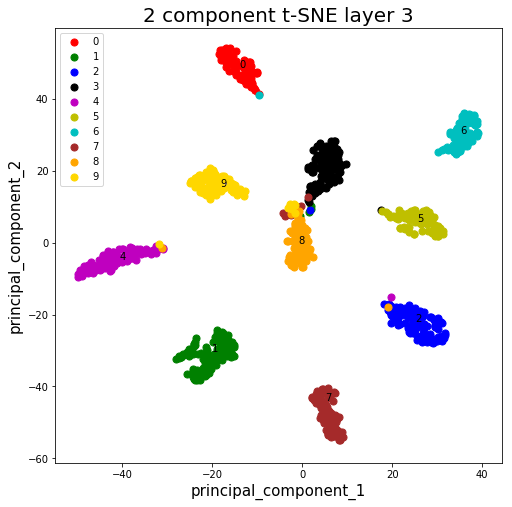

In [345]:
# 3rd layer # t-SNE
import pandas as pd
import numpy as np

pca_pred_l3_t=TSNE(n_components=2).fit_transform(intermediate_output[2])
pricipaldf3_t=pd.DataFrame(data=pca_pred_l3_t,columns=['principal_component_13t','principal_component_23t'])


y=y_test[:1000]
target=pd.DataFrame(y)

finaldf3_t=pd.concat([pricipaldf3_t,target],axis=1)
finaldf3_t.columns = ['principal_component_13t','principal_component_23t','target']
print(finaldf3_t.head(5))

fig=plt.figure(figsize=(8,8))
ax=plt.axes()
ax.set_xlabel('principal_component_1', fontsize=15)
ax.set_ylabel('principal_component_2',fontsize=15)
ax.set_title('2 component t-SNE layer 3',fontsize=20)
targets3=[0,1,2,3,4,5,6,7,8,9]
colors=['r','g','b','k','m','y','c','brown','orange','gold']

for target_num, color in zip(targets3,colors):
    indicesToKeep=finaldf3_t['target']==target_num
    
    temp_mean_x = finaldf3_t.loc[indicesToKeep, 'principal_component_13t'].mean()
    temp_mean_y = finaldf3_t.loc[indicesToKeep, 'principal_component_23t'].mean()
    plt.text(temp_mean_x, temp_mean_y, target_num)
    ax.scatter(finaldf3_t.loc[indicesToKeep, 'principal_component_13t'],finaldf3_t.loc[indicesToKeep, 'principal_component_23t'],c=color,s=50)
    ax.legend(targets3)
    ax.grid()

   principal_component_14  principal_component_24  target
0              186.868118              -52.060490       7
1               -7.148497               24.467827       2
2               -6.649387              -24.118933       1
3              -13.558271              -10.502167       0
4               21.468241              124.109230       4


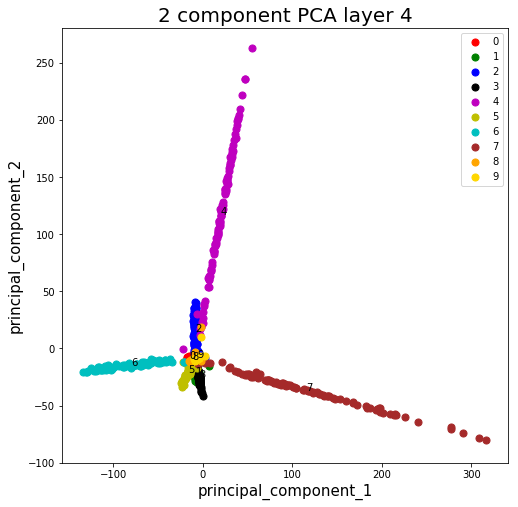

In [346]:
#4-th layer
from sklearn.decomposition import PCA
pca_pred_l4=PCA(n_components=2).fit_transform(intermediate_output[3])
pricipaldf4=pd.DataFrame(data=pca_pred_l4,columns=['principal_component_14','principal_component_24'])


y=y_test[:1000]
target=pd.DataFrame(y)

finaldf4=pd.concat([pricipaldf4,target],axis=1)
finaldf4.columns = ['principal_component_14','principal_component_24','target']
print(finaldf4.head(5))



fig=plt.figure(figsize=(8,8))
ax=plt.axes()
ax.set_xlabel('principal_component_1', fontsize=15)
ax.set_ylabel('principal_component_2',fontsize=15)
ax.set_title('2 component PCA layer 4',fontsize=20)
targets4=[0,1,2,3,4,5,6,7,8,9]
colors=['r','g','b','k','m','y','c','brown','orange','gold']

for target_num, color in zip(targets4,colors):
    indicesToKeep=finaldf4['target']==target_num
    
    temp_mean_x = finaldf4.loc[indicesToKeep, 'principal_component_14'].mean()
    temp_mean_y = finaldf4.loc[indicesToKeep, 'principal_component_24'].mean()
    plt.text(temp_mean_x, temp_mean_y, target_num)
    ax.scatter(finaldf4.loc[indicesToKeep, 'principal_component_14'],finaldf4.loc[indicesToKeep, 'principal_component_24'],c=color,s=50)
    ax.legend(targets4)
    ax.grid()

   principal_component_14t  principal_component_24t  target
0                28.611088               -39.392693       7
1                -4.256570               -46.466888       2
2                43.746025                15.678432       1
3                 9.141903                37.153015       0
4               -33.923515                -3.647154       4


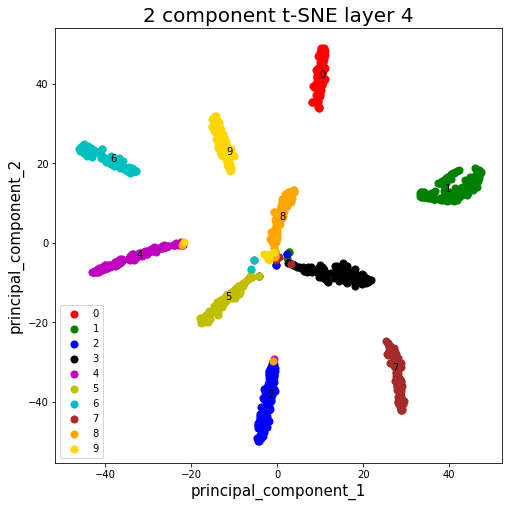

In [347]:
# 4th layer # t-SNE
import pandas as pd
import numpy as np

pca_pred_l4_t=TSNE(n_components=2).fit_transform(intermediate_output[3])
pricipaldf4_t=pd.DataFrame(data=pca_pred_l4_t,columns=['principal_component_14t','principal_component_24t'])


y=y_test[:1000]
target=pd.DataFrame(y)

finaldf4_t=pd.concat([pricipaldf4_t,target],axis=1)
finaldf4_t.columns = ['principal_component_14t','principal_component_24t','target']
print(finaldf4_t.head(5))

fig=plt.figure(figsize=(8,8))
ax=plt.axes()
ax.set_xlabel('principal_component_1', fontsize=15)
ax.set_ylabel('principal_component_2',fontsize=15)
ax.set_title('2 component t-SNE layer 4',fontsize=20)
targets4=[0,1,2,3,4,5,6,7,8,9]
colors=['r','g','b','k','m','y','c','brown','orange','gold']

for target_num, color in zip(targets5,colors):
    indicesToKeep=finaldf4_t['target']==target_num
    
    temp_mean_x = finaldf4_t.loc[indicesToKeep, 'principal_component_14t'].mean()
    temp_mean_y = finaldf4_t.loc[indicesToKeep, 'principal_component_24t'].mean()
    plt.text(temp_mean_x, temp_mean_y, target_num)
    ax.scatter(finaldf4_t.loc[indicesToKeep, 'principal_component_14t'],finaldf4_t.loc[indicesToKeep, 'principal_component_24t'],c=color,s=50)
    ax.legend(targets4)
    ax.grid()

   principal_component_15  principal_component_25  target
0             -153.966675              -77.547401       7
1               -5.083487               59.211342       2
2              -28.707941             -104.739731       1
3               27.883371               11.801368       0
4               -9.847173              106.120049       4


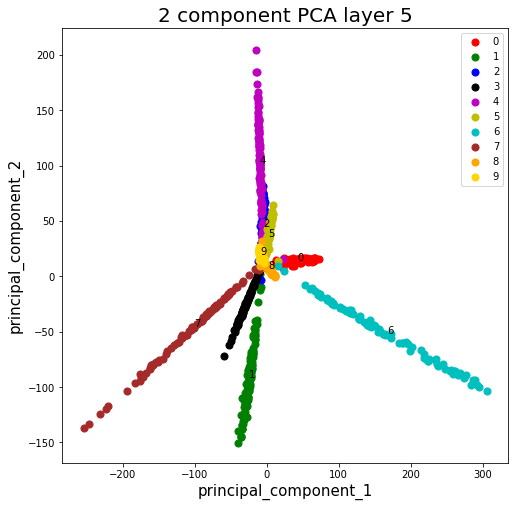

In [348]:
#layer 5
from sklearn.decomposition import PCA
pca_pred_l5=PCA(n_components=2).fit_transform(intermediate_output[4])
pricipaldf5=pd.DataFrame(data=pca_pred_l5,columns=['principal_component_15','principal_component_25'])


y=y_test[:1000]
target=pd.DataFrame(y)

finaldf5=pd.concat([pricipaldf5,target],axis=1)
finaldf5.columns = ['principal_component_15','principal_component_25','target']
print(finaldf5.head(5))



fig=plt.figure(figsize=(8,8))
ax=plt.axes()
ax.set_xlabel('principal_component_1', fontsize=15)
ax.set_ylabel('principal_component_2',fontsize=15)
ax.set_title('2 component PCA layer 5',fontsize=20)
targets5=[0,1,2,3,4,5,6,7,8,9]
colors=['r','g','b','k','m','y','c','brown','orange','gold']

for target_num, color in zip(targets5,colors):
    indicesToKeep=finaldf5['target']==target_num
    
    temp_mean_x = finaldf5.loc[indicesToKeep, 'principal_component_15'].mean()
    temp_mean_y = finaldf5.loc[indicesToKeep, 'principal_component_25'].mean()
    plt.text(temp_mean_x, temp_mean_y, target_num)
    ax.scatter(finaldf5.loc[indicesToKeep, 'principal_component_15'],finaldf5.loc[indicesToKeep, 'principal_component_25'],c=color,s=50)
    ax.legend(targets5)
    ax.grid()

   principal_component_15t  principal_component_25t  target
0                37.917908               -26.744553       7
1               -32.821495                31.216631       2
2                 5.468124               -49.168301       1
3                38.949959                 3.861445       0
4               -21.847504               -19.188450       4


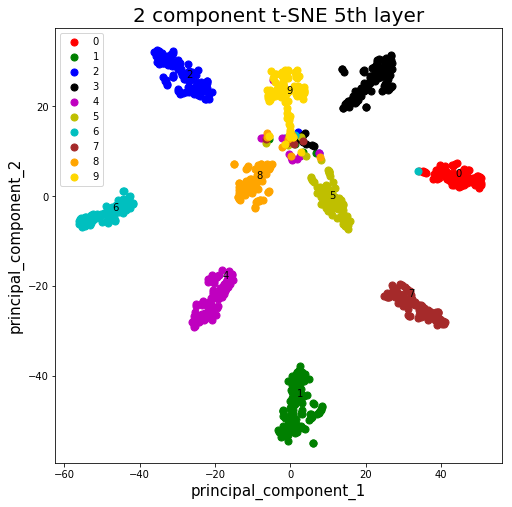

In [349]:
# 5th layer # t-SNE
import pandas as pd
import numpy as np

pca_pred_l5_t=TSNE(n_components=2).fit_transform(intermediate_output[4])
pricipaldf5_t=pd.DataFrame(data=pca_pred_l5_t,columns=['principal_component_15t','principal_component_25t'])


y=y_test[:1000]
target=pd.DataFrame(y)

finaldf5_t=pd.concat([pricipaldf5_t,target],axis=1)
finaldf5_t.columns = ['principal_component_15t','principal_component_25t','target']
print(finaldf5_t.head(5))

fig=plt.figure(figsize=(8,8))
ax=plt.axes()
ax.set_xlabel('principal_component_1', fontsize=15)
ax.set_ylabel('principal_component_2',fontsize=15)
ax.set_title('2 component t-SNE 5th layer',fontsize=20)
targets5=[0,1,2,3,4,5,6,7,8,9]
colors=['r','g','b','k','m','y','c','brown','orange','gold']

for target_num, color in zip(targets5,colors):
    indicesToKeep=finaldf5_t['target']==target_num
    
    temp_mean_x = finaldf5_t.loc[indicesToKeep, 'principal_component_15t'].mean()
    temp_mean_y = finaldf5_t.loc[indicesToKeep, 'principal_component_25t'].mean()
    plt.text(temp_mean_x, temp_mean_y, target_num)
    ax.scatter(finaldf5_t.loc[indicesToKeep, 'principal_component_15t'],finaldf5_t.loc[indicesToKeep, 'principal_component_25t'],c=color,s=50)
    ax.legend(targets5)
    ax.grid()

   principal_component_17  principal_component_27  target
0               -0.147692               -0.288966     7.0
1               -0.183065                0.901854     2.0
2                0.930492                0.042028     1.0
3               -0.109756               -0.099696     0.0
4               -0.106571               -0.090115     4.0


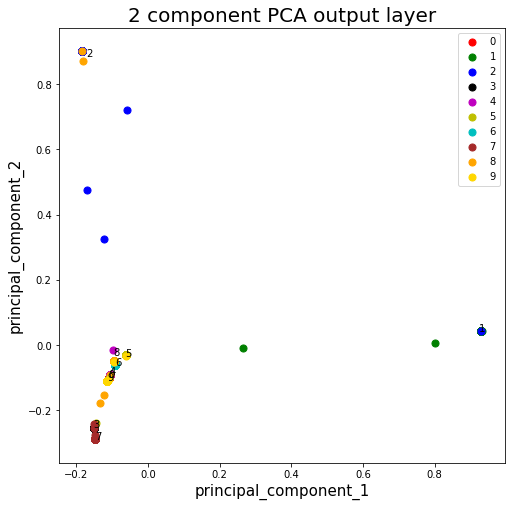

In [350]:
# output layer

#layer 6th
from sklearn.decomposition import PCA
pca_pred_l7=PCA(n_components=2).fit_transform(predictions)
pricipaldf7=pd.DataFrame(data=pca_pred_l7,columns=['principal_component_17','principal_component_27'])


y=y_test[:1000]
target=pd.DataFrame(y)

finaldf7=pd.concat([pricipaldf7,target],axis=1)
finaldf7.columns = ['principal_component_17','principal_component_27','target']
print(finaldf7.head(5))



fig=plt.figure(figsize=(8,8))
ax=plt.axes()
ax.set_xlabel('principal_component_1', fontsize=15)
ax.set_ylabel('principal_component_2',fontsize=15)
ax.set_title('2 component PCA output layer',fontsize=20)
targets7=[0,1,2,3,4,5,6,7,8,9]
colors=['r','g','b','k','m','y','c','brown','orange','gold']

for target_num, color in zip(targets4,colors):
    indicesToKeep=finaldf7['target']==target_num
    
    temp_mean_x = finaldf7.loc[indicesToKeep, 'principal_component_17'].mean()
    temp_mean_y = finaldf7.loc[indicesToKeep, 'principal_component_27'].mean()
    plt.text(temp_mean_x, temp_mean_y, target_num)
    ax.scatter(finaldf7.loc[indicesToKeep, 'principal_component_17'],finaldf7.loc[indicesToKeep, 'principal_component_27'],c=color,s=50)
    ax.legend(targets7)
    ax.grid()

   principal_component_17t  principal_component_27t  target
0                20.093067               -23.532156     7.0
1                10.456316               -50.675674     2.0
2               -32.476330                21.481321     1.0
3                23.049580                 6.198115     0.0
4               -38.286785                -9.526209     4.0


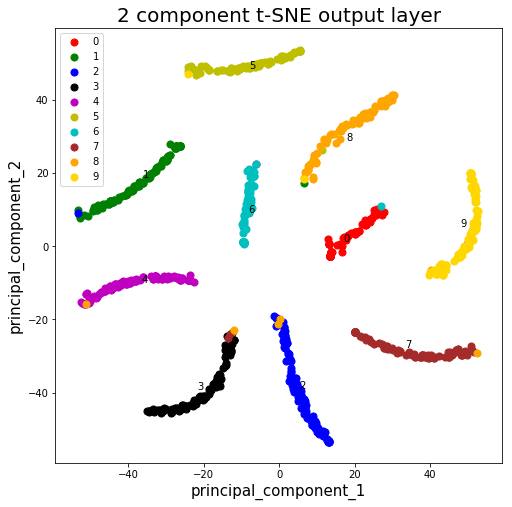

In [351]:
# 6th layer -  # t-SNE
import pandas as pd
import numpy as np

pca_pred_l7_t=TSNE(n_components=2).fit_transform(predictions)
pricipaldf7_t=pd.DataFrame(data=pca_pred_l7_t,columns=['principal_component_17t','principal_component_27t'])


y=y_test[:1000]
target=pd.DataFrame(y)

finaldf7_t=pd.concat([pricipaldf7_t,target],axis=1)
finaldf7_t.columns = ['principal_component_17t','principal_component_27t','target']
print(finaldf7_t.head(5))

fig=plt.figure(figsize=(8,8))
ax=plt.axes()
ax.set_xlabel('principal_component_1', fontsize=15)
ax.set_ylabel('principal_component_2',fontsize=15)
ax.set_title('2 component t-SNE output layer',fontsize=20)
targets7=[0,1,2,3,4,5,6,7,8,9]
colors=['r','g','b','k','m','y','c','brown','orange','gold']

for target_num, color in zip(targets7,colors):
    indicesToKeep=finaldf7_t['target']==target_num
    
    temp_mean_x = finaldf7_t.loc[indicesToKeep, 'principal_component_17t'].mean()
    temp_mean_y = finaldf7_t.loc[indicesToKeep, 'principal_component_27t'].mean()
    plt.text(temp_mean_x, temp_mean_y, target_num)
    ax.scatter(finaldf7_t.loc[indicesToKeep, 'principal_component_17t'],finaldf7_t.loc[indicesToKeep, 'principal_component_27t'],c=color,s=50)
    ax.legend(targets7)
    ax.grid()

1.6. you can examine if your data is easy to classify or not. Do you think this raw image samples are easy to classify? 

Answer: The raw image samples were difficult to classify as we can observe from the PCA and t-SNE plot of the test data with 1000 samples, that there are no(PCA) or few(TSNE) distinct clusters in the plot. But from the output of successive layers, we can observe there is a gradual formation of clusters of different digits. This happends as layers go deep, their ability to learn complex patterns increases. Hence, the successive layers are providing better results and classification  becomes easier. These cluster formations are more evident in t-SNE plot. The t-SNE plot of the output of the last layer clearly shows 10 distinct clusters with some rare points that are clustered in wrong class.

1.8. Repeat this procedure for all your layers including the last one. Explain your observation.

Answer: I observed that raw images were difficult to classify. The PCA and t-SNE plot of successive layers gradually gave better results.This is due to the fact that, as layers go deep, their ability to learn complex patterns increases. They are able to distinguish between important and non important features and hence provides better result.
The t-SNE plot were better as compared to PCA plot,this may be due to the reason that PCA is a linear feature extraction technique whereas t-sne is nonlinear technique to reduce the dimension.  In contrast to PCA, the plot of T-SNE shows almost perfect separation among the digits classes. The t-sne plot shows 10 distinct clusters with only few points that are clustered in wrong class.
T-SNE did an impressive job finding clsuters in the data, but it is prone to get stuck in local minima as T-SNE conatins some points that are clustered with the wrong class, but most of these points correspond to distorted digits which are difficult to identify.
 
T-SNE took more time to display output as compared to PCA. In PCA plot we can observe that points are overlapping, PCA being linear projections was ubale to to classify the high dimensional MNIST data perfectly. 

    

Question no:2

In [12]:
import numpy as np
import librosa
s, sr=librosa.load(r'train_clean_male.wav', sr=None)
S=librosa.stft(s, n_fft=1024, hop_length=512)
sn, sr=librosa.load(r'train_dirty_male.wav', sr=None)
X=librosa.stft(sn, n_fft=1024, hop_length=512)

data, sr=librosa.load(r'test_x_01.wav', sr=None)
data1=librosa.stft(data, n_fft=1024, hop_length=512)

data_2, sr=librosa.load(r'test_x_02.wav', sr=None)
data2=librosa.stft(data_2, n_fft=1024, hop_length=512)

In [13]:
train_y=np.abs(S)
train_x=np.abs(X)
test_x=np.abs(data1)
test_x2=np.abs(data2)

train_yt=train_y.transpose()
train_xt=train_x.transpose()
test_xt=test_x.transpose()
test_x2t=test_x2.transpose()


In [14]:
# Build the model 
# Feed forward netwrok(SEQUENTIAL)

from keras import initializers


from keras import models
from keras import layers

model1 = models.Sequential()

# 1st hidden layer 
model1.add(layers.Dense(700, activation='relu',kernel_initializer='he_normal',input_shape=(513,)))

# 2nd hidden layer 
model1.add(layers.Dense(700, activation='relu',kernel_initializer='he_normal'))



#3th hidden layer
model1.add(layers.Dense(700, activation='relu',kernel_initializer='he_normal'))


# Final output layer 
model1.add(layers.Dense(513, activation='relu',kernel_initializer='he_normal'))

# parameters for the training of the model
# neural netwrok tries to minimize the loss, loss is relationship to accuarcy 

model1.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

model1.fit(train_xt,train_yt,epochs=70,batch_size=100,validation_split = 0.2)

Train on 1967 samples, validate on 492 samples
Epoch 1/70
1967/1967 [==============================] - 1s 412us/step - loss: 0.0575 - acc: 0.1403 - val_loss: 0.0370 - val_acc: 0.2642
Epoch 2/70
1967/1967 [==============================] - 1s 277us/step - loss: 0.0253 - acc: 0.2816 - val_loss: 0.0298 - val_acc: 0.3049
Epoch 3/70
1967/1967 [==============================] - 1s 269us/step - loss: 0.0199 - acc: 0.3371 - val_loss: 0.0268 - val_acc: 0.3557
Epoch 4/70
1967/1967 [==============================] - 1s 281us/step - loss: 0.0169 - acc: 0.3798 - val_loss: 0.0249 - val_acc: 0.3618
Epoch 5/70
1967/1967 [==============================] - 1s 277us/step - loss: 0.0153 - acc: 0.4026 - val_loss: 0.0231 - val_acc: 0.3882
Epoch 6/70
1967/1967 [==============================] - 1s 277us/step - loss: 0.0143 - acc: 0.4138 - val_loss: 0.0221 - val_acc: 0.3801
Epoch 7/70
1967/1967 [==============================] - 1s 272us/step - loss: 0.0134 - acc: 0.4143 - val_loss: 0.0212 - val_acc: 0.3862
E

1967/1967 [==============================] - 1s 282us/step - loss: 0.0058 - acc: 0.5160 - val_loss: 0.0142 - val_acc: 0.4167
Epoch 61/70
1967/1967 [==============================] - 1s 279us/step - loss: 0.0053 - acc: 0.5211 - val_loss: 0.0143 - val_acc: 0.4085
Epoch 62/70
1967/1967 [==============================] - 1s 288us/step - loss: 0.0054 - acc: 0.5191 - val_loss: 0.0143 - val_acc: 0.4065
Epoch 63/70
1967/1967 [==============================] - 1s 282us/step - loss: 0.0051 - acc: 0.5318 - val_loss: 0.0141 - val_acc: 0.4228
Epoch 64/70
1967/1967 [==============================] - 1s 286us/step - loss: 0.0051 - acc: 0.5282 - val_loss: 0.0136 - val_acc: 0.4207
Epoch 65/70
1967/1967 [==============================] - 1s 282us/step - loss: 0.0048 - acc: 0.5252 - val_loss: 0.0133 - val_acc: 0.4207
Epoch 66/70
1967/1967 [==============================] - 1s 283us/step - loss: 0.0047 - acc: 0.5282 - val_loss: 0.0134 - val_acc: 0.4126
Epoch 67/70
1967/1967 [==============================

In [15]:
# The output of the network for test_x_01
Stest = np.abs(model1.predict([test_xt]))
print(Stest.shape)
print(Stest)


k=np.divide(data1,test_x)
S1=np.multiply(k,Stest.transpose())

(142, 513)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.00613808]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [16]:
# Inverse of STFT for test_x_01

stest=librosa.istft(S1, hop_length=512)

# output file of the recorded voice for test_x_01

librosa.output.write_wav('Record1.wav', stest,sr)

In [17]:
# The output of the network for test_x_02
Stest2 = np.abs(model1.predict([test_x2t]))
print(Stest2.shape)
print(Stest2)

(380, 513)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [18]:
k2=np.divide(data2,test_x2)
S2=np.multiply(k2,Stest2.transpose())


# Inverse of STFT for test_x_02

stest2=librosa.istft(S2,hop_length=512)

# output file of the recorded voice for test_x_02

librosa.output.write_wav('Record2.wav', stest2,sr)

In [19]:
#Calculation of SNR ratio
d=np.abs(model1.predict([train_xt]))
d_out=np.divide(X,train_x)
d_out=np.multiply(d_out,d.transpose())

In [20]:
# SNR ratio on training data
SNR=10*np.log10(np.add.reduce(S**2,axis=None)/np.add.reduce((S-d_out)**2, axis=None))
SNR

(16.431374549865723+12.900307178497314j)

<audio src="Record.wav" controls>alternative text</audio>
<audio src="Record2.wav" controls>alternative text</audio>